In [1]:
import pandas as pd

# Path to the CSV file
file_path = "C:/Users/Varsha/Downloads/Super_Store_data.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, encoding='latin1')

# Display the first few rows of the DataFrame
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Customer Name   Segment        Country             City  ... Postal Code  \
0      Claire Gute  Consumer  United States        Henderson  ...       42420   
1      Claire Gute  Consumer  United States        Henderson  ...       42420   
2   Sean O'Donnell  Consumer  United States  Fort Lauderdale  ...       33311   
3  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   
4  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   

   Region       Product ID

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [3]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [4]:
df.shape

(2121, 21)

In [5]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
# Convert 'Order Date' column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Find the minimum and maximum order dates
min_order_date = df['Order Date'].min()
max_order_date = df['Order Date'].max()

# Print the first and last order dates
print("First order date:", min_order_date)
print("Last order date:", max_order_date)

First order date: 2014-01-06 00:00:00
Last order date: 2017-12-30 00:00:00


In [7]:
df.drop(['Row ID','Order ID','Customer ID','Customer Name','Country','Product ID'],axis=1,inplace=True)

In [8]:
df.shape

(2121, 15)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import probplot
import warnings, joblib, gc, re, time
warnings.filterwarnings('ignore')

In [10]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

        Postal Code        Sales     Quantity     Discount       Profit
count   2121.000000  2121.000000  2121.000000  2121.000000  2121.000000
mean   55726.556341   349.834887     3.785007     0.173923     8.699327
std    32261.888225   503.179145     2.251620     0.181547   136.049246
min     1040.000000     1.892000     1.000000     0.000000 -1862.312400
25%    22801.000000    47.040000     2.000000     0.000000   -12.849000
50%    60505.000000   182.220000     3.000000     0.200000     7.774800
75%    90032.000000   435.168000     5.000000     0.300000    33.726600
max    99301.000000  4416.174000    14.000000     0.700000  1013.127000


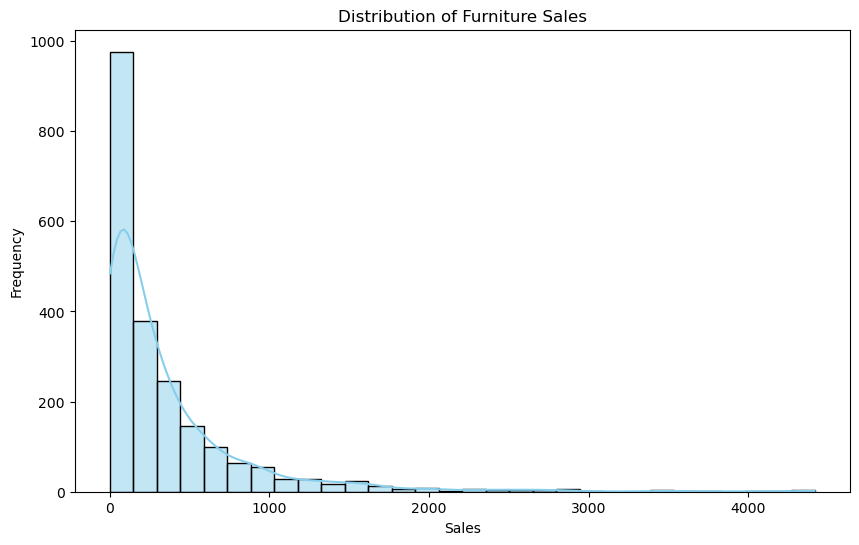

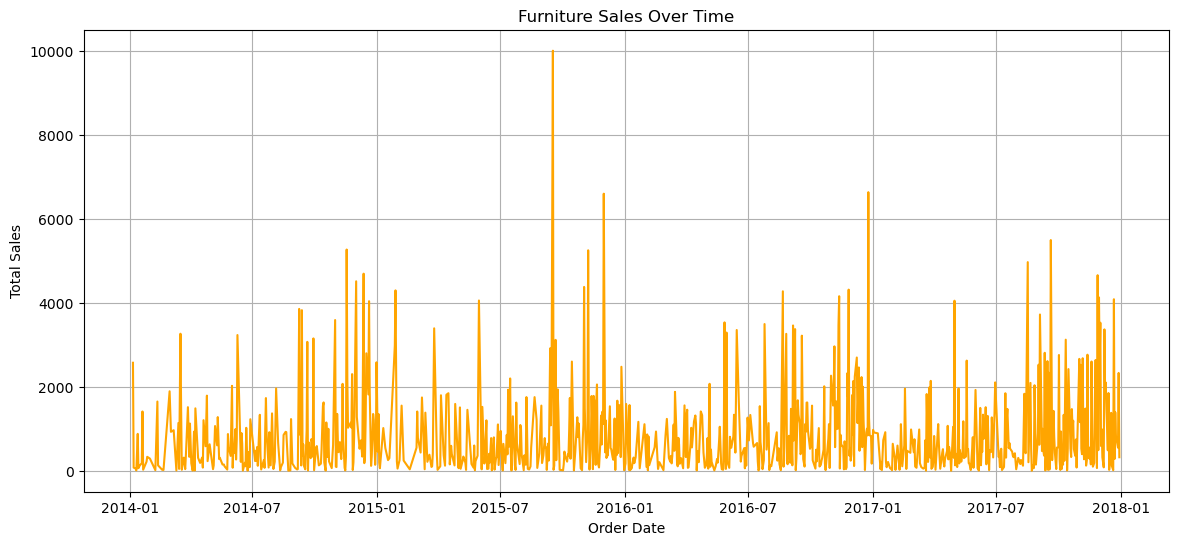

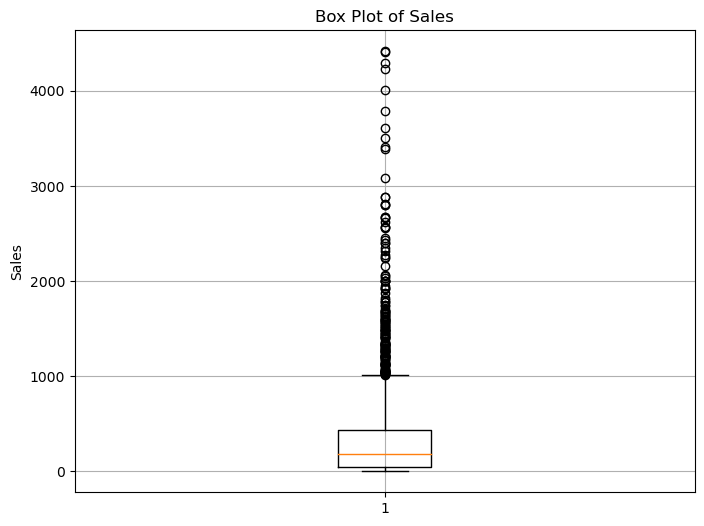

In [11]:
# Distribution of furniture sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Furniture Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Group sales by date and calculate total sales for each date
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

# Plotting furniture sales over time
plt.figure(figsize=(14, 6))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], color='orange')
plt.title('Furniture Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

#Box plotting of Sales
plt.figure(figsize=(8, 6))
plt.boxplot(df['Sales'])
plt.title('Box Plot of Sales')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

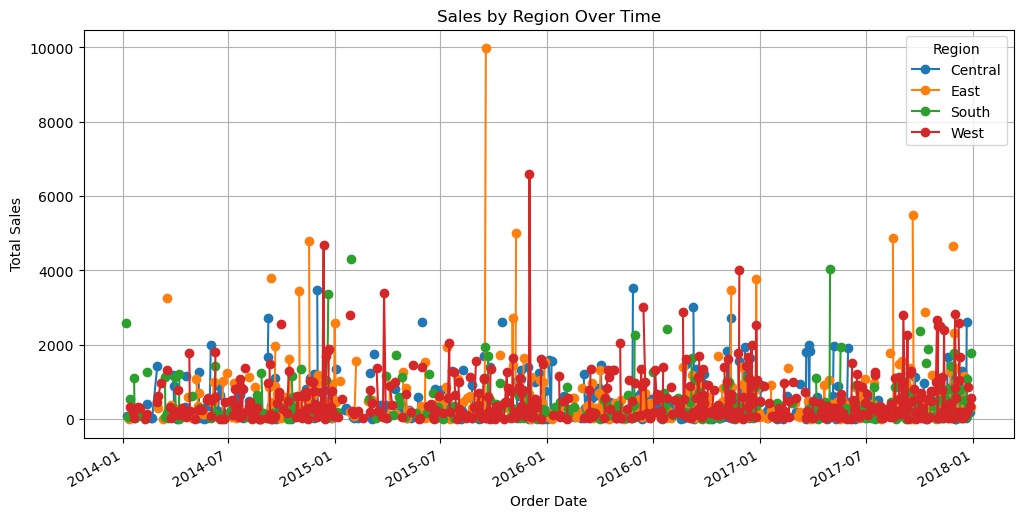

In [12]:
#Line plotting sales by region over time
plt.figure(figsize=(12, 6))
region_sales = df.groupby(['Order Date', 'Region'])['Sales'].sum().unstack()
region_sales.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Sales by Region Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend(title='Region')
plt.show()

Skewness of Postal Code: -0.16116852483790017
Kurtosis of Postal Code: -1.494476110512185


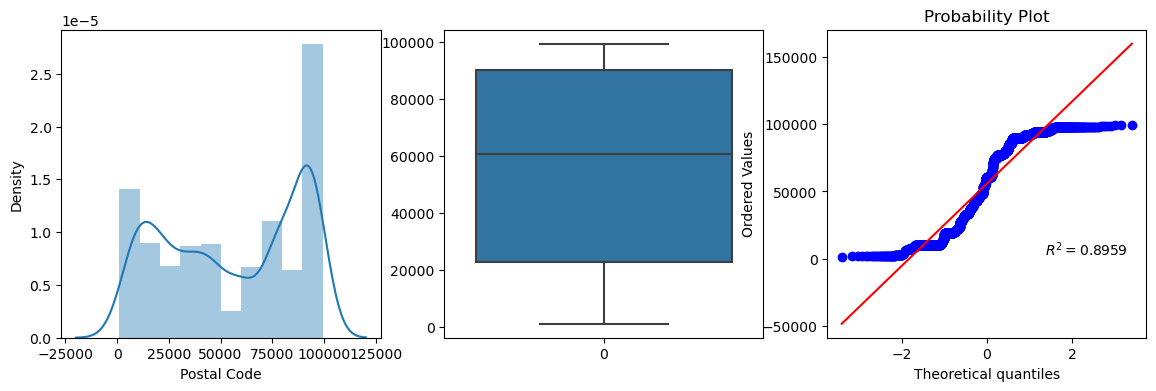

Skewness of Sales: 3.3491680662644945
Kurtosis of Sales: 15.916809993416377


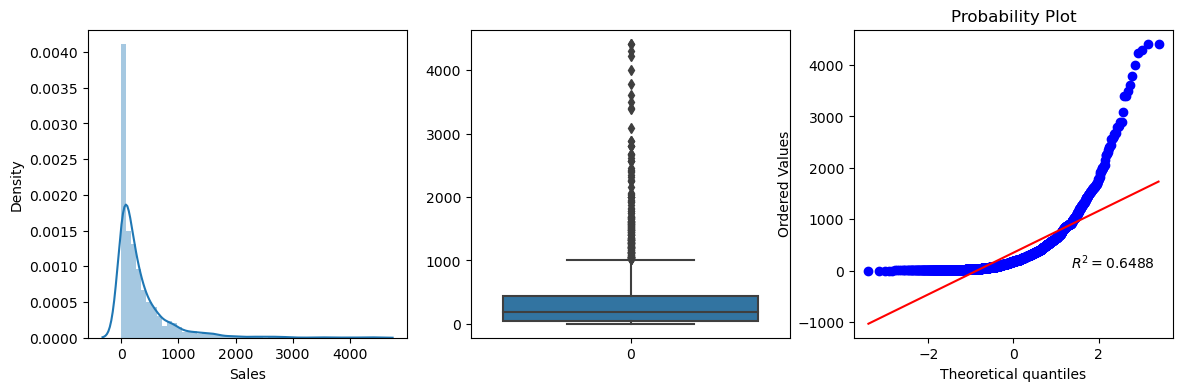

Skewness of Quantity: 1.3452701365182196
Kurtosis of Quantity: 2.2214521494492687


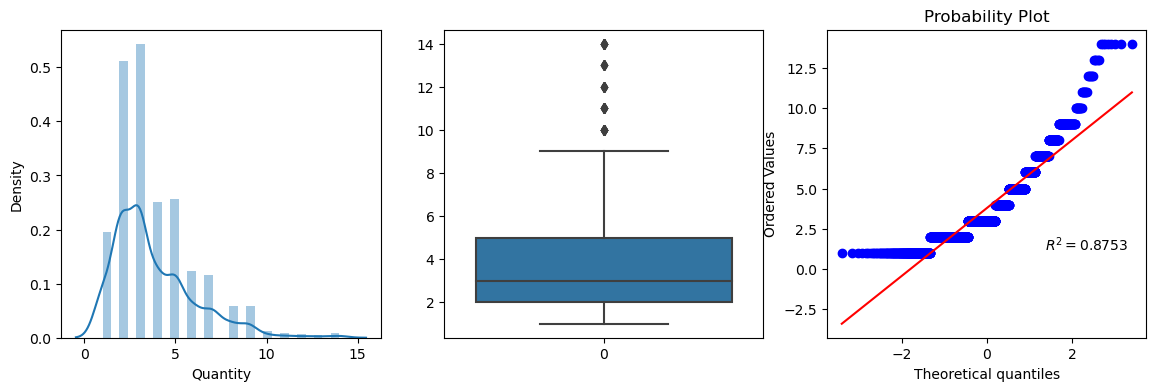

Skewness of Discount: 0.9420485488649216
Kurtosis of Discount: 0.2194718821004038


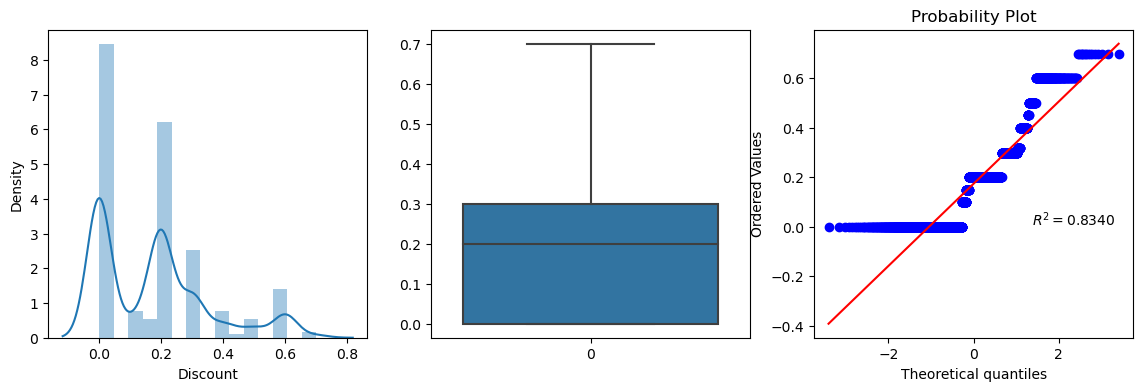

Skewness of Profit: -2.2854555745965333
Kurtosis of Profit: 37.00338268917311


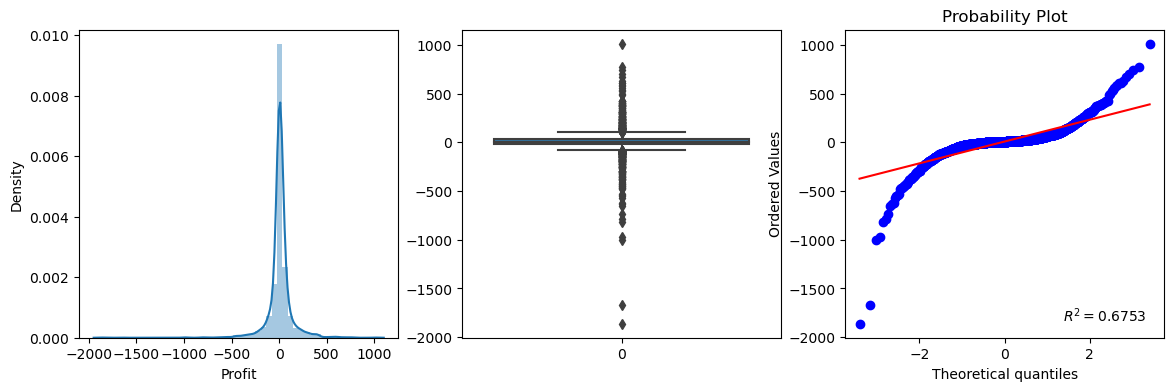

In [13]:
for col in df.select_dtypes(np.number).columns:
    print(f"Skewness of {col}:",df[col].skew())
    print(f"Kurtosis of {col}:",df[col].kurt())
    plt.subplots(nrows=1,ncols=2,figsize=(14,4))
    plt.subplot(1,3,1)
    sns.distplot(df[col])
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    probplot(df[col],plot=plt,dist='norm',rvalue=True)
    plt.show()

In [14]:
skewed_cols = ['Quantity','Discount','Profit']

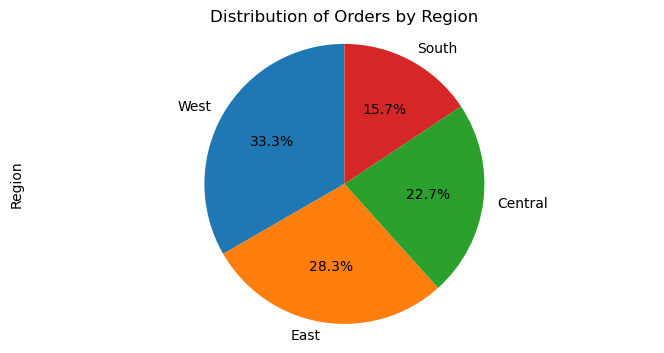

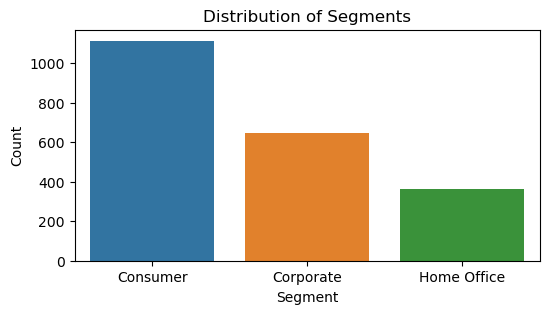

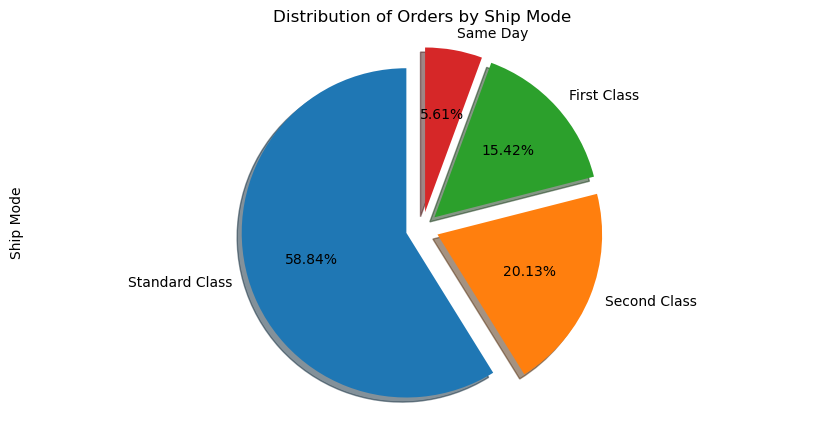

In [68]:
# Pie chart for region
plt.figure(figsize=(8, 4))
df['Region'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Orders by Region')
plt.axis('equal')
plt.show()

# Count plot for segment
plt.figure(figsize=(6, 3))
sns.countplot(x='Segment', data=df)
plt.title('Distribution of Segments')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

# Pie chart for Ship mode
plt.figure(figsize=(10, 5))
df['Ship Mode'].value_counts().plot(kind='pie', autopct='%1.2f%%', shadow=True, explode=[0.1]*4, startangle=90)
plt.title('Distribution of Orders by Ship Mode')
plt.axis('equal')
plt.show()


In [67]:
sub_category_count = df['Sub-Category'].value_counts()

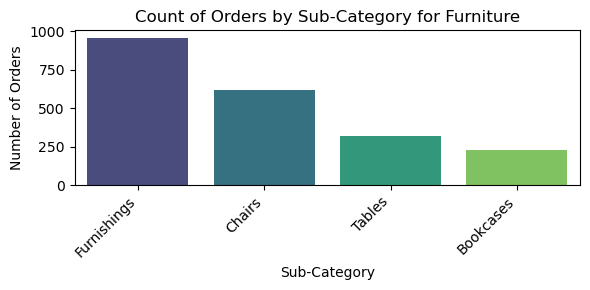

In [19]:
# Create a bar plot
plt.figure(figsize=(6, 3))
sns.barplot(x=sub_category_count.index, y=sub_category_count.values, palette='viridis')
plt.title('Count of Orders by Sub-Category for Furniture')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

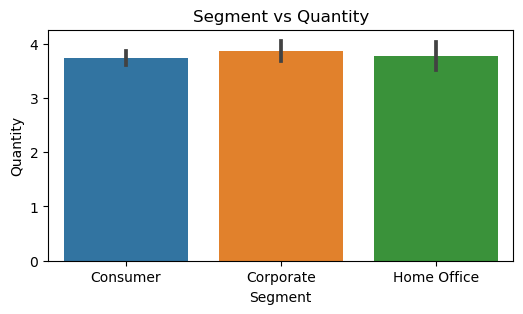

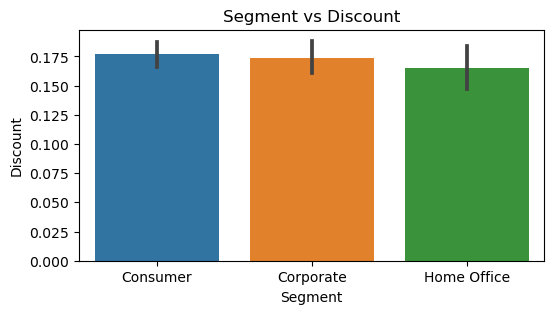

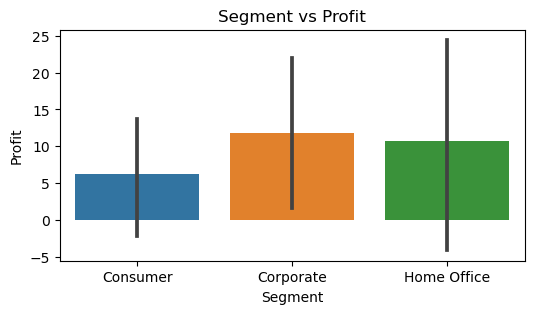

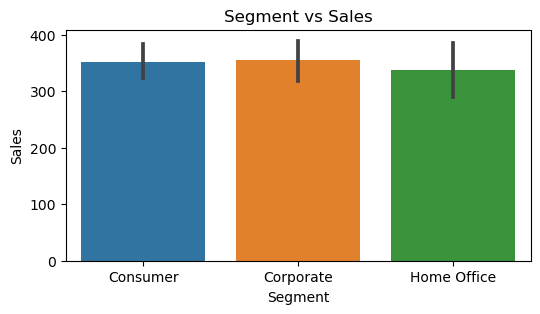

In [20]:
attributes = ['Quantity', 'Discount', 'Profit', 'Sales']
titles = ['Segment vs Quantity', 'Segment vs Discount', 'Segment vs Profit', 'Segment vs Sales']

for attribute, title in zip(attributes, titles):
    plt.figure(figsize=(6, 3))
    sns.barplot(x='Segment', y=attribute, data=df)
    plt.title(title)
    plt.show()

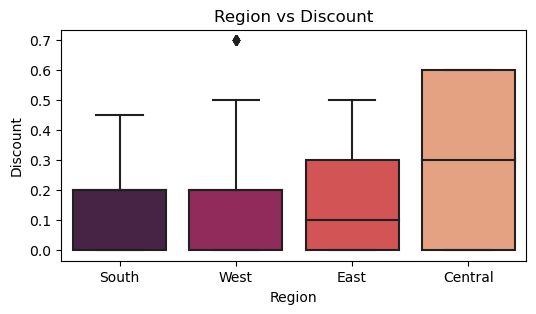

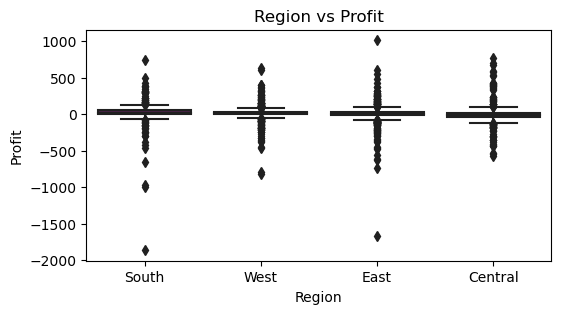

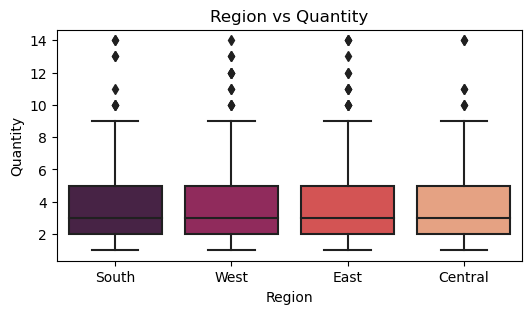

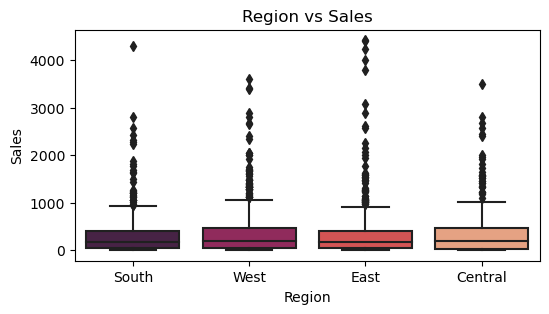

In [21]:
attributes = ['Discount', 'Profit', 'Quantity', 'Sales']

# Loop over each attribute and create box plots
for attribute in attributes:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='Region', y=attribute, data=df, palette='rocket')
    plt.title(f'Region vs {attribute}')
    plt.xlabel('Region')
    plt.ylabel(attribute)
    plt.show()

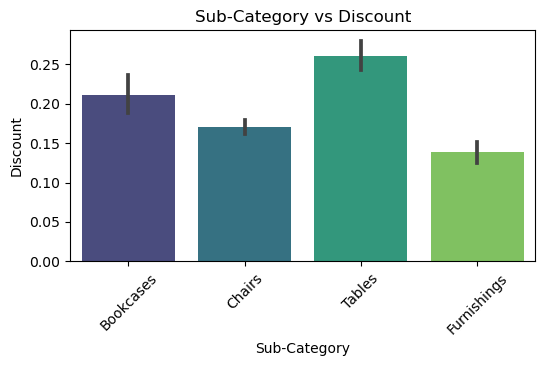

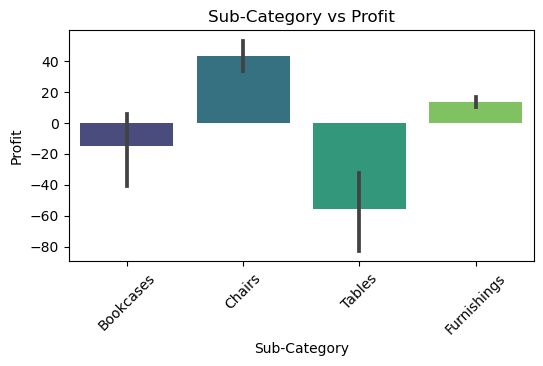

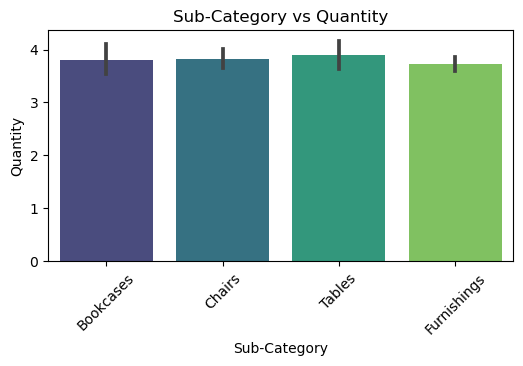

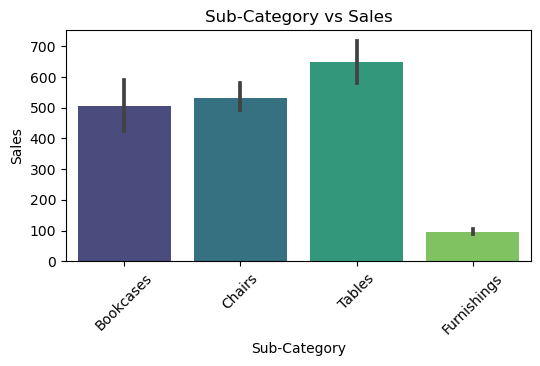

In [22]:
attributes = ['Discount', 'Profit', 'Quantity', 'Sales']
titles = ['Sub-Category vs Discount', 'Sub-Category vs Profit', 'Sub-Category vs Quantity', 'Sub-Category vs Sales']

# Loop over each attribute and create bar plots for each sub-category
for attribute, title in zip(attributes, titles):
    plt.figure(figsize=(6, 3))
    sns.barplot(x='Sub-Category', y=attribute, data=df, palette='viridis')
    plt.title(title)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()

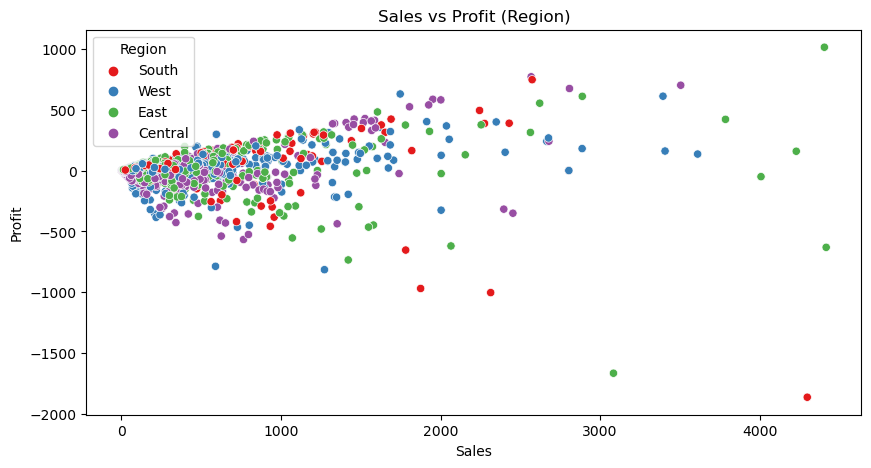

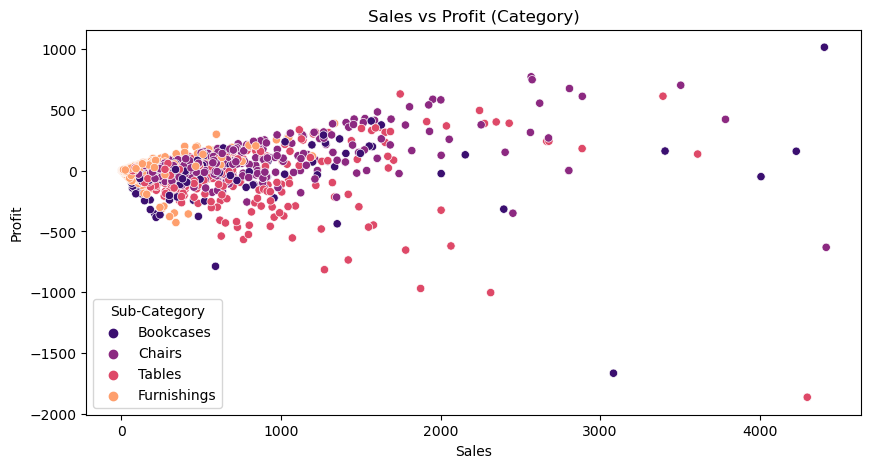

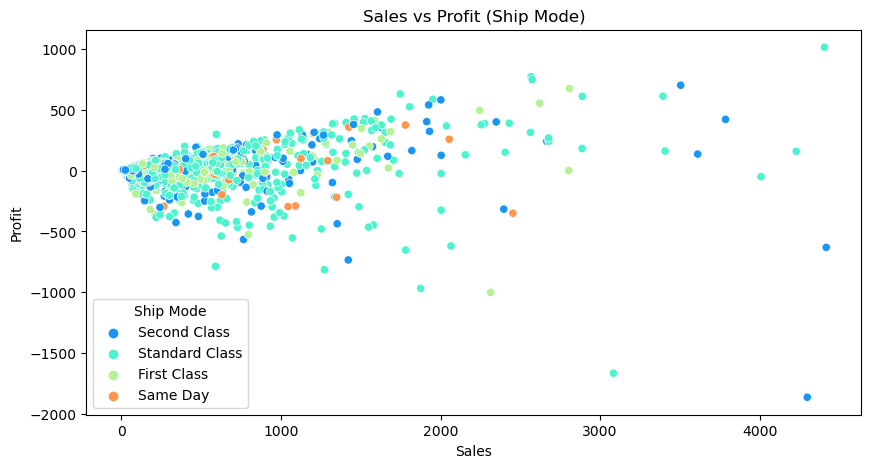

In [23]:
def create_scatterplot(attribute, hue, palette):
    plt.figure(figsize=(10, 5))
    fig = sns.scatterplot(x='Sales', y='Profit', data=df, hue=hue, palette=palette)
    plt.title(f'Sales vs Profit ({attribute})')
    plt.show()
    plt.close('all')
    del fig

# Call the function for different attributes and hues
create_scatterplot('Region', 'Region', 'Set1')
create_scatterplot('Category', 'Sub-Category', 'magma')
create_scatterplot('Ship Mode', 'Ship Mode', 'rainbow')

<Figure size 1000x500 with 0 Axes>

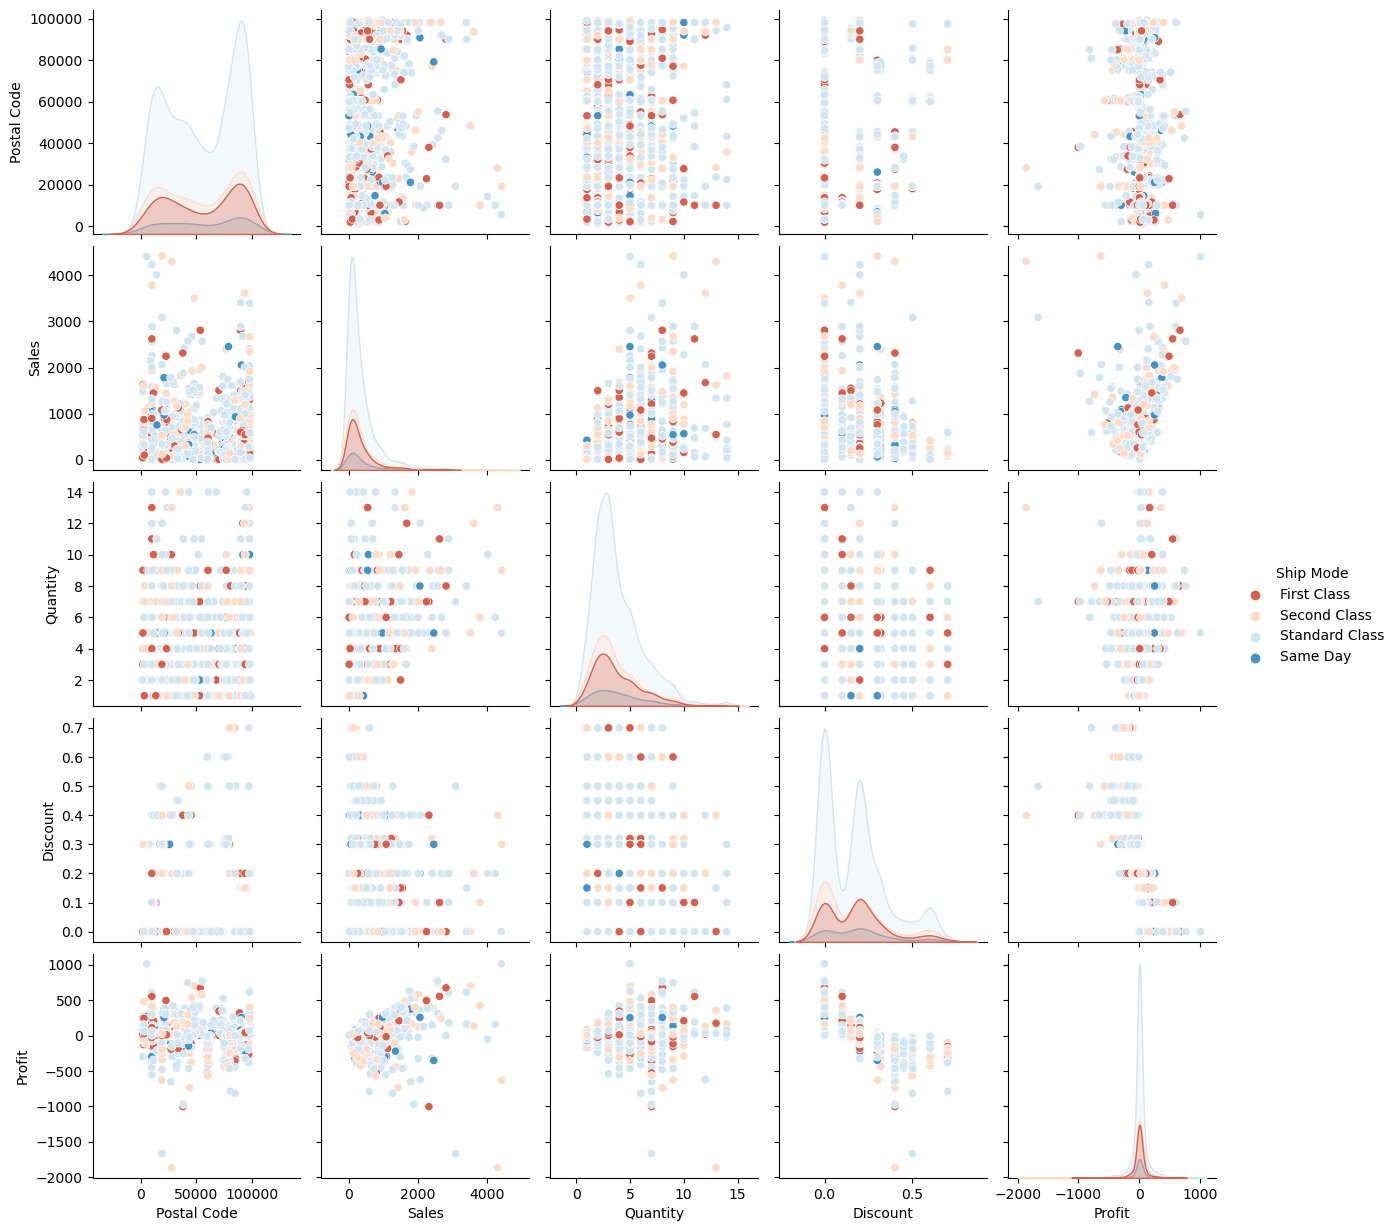

In [24]:
plt.figure(figsize=(10, 5))
sample_size = min(5000, len(df))
fig = sns.pairplot(df.sample(n=sample_size), hue='Ship Mode', palette='RdBu')
plt.show()
plt.close('all')
del fig

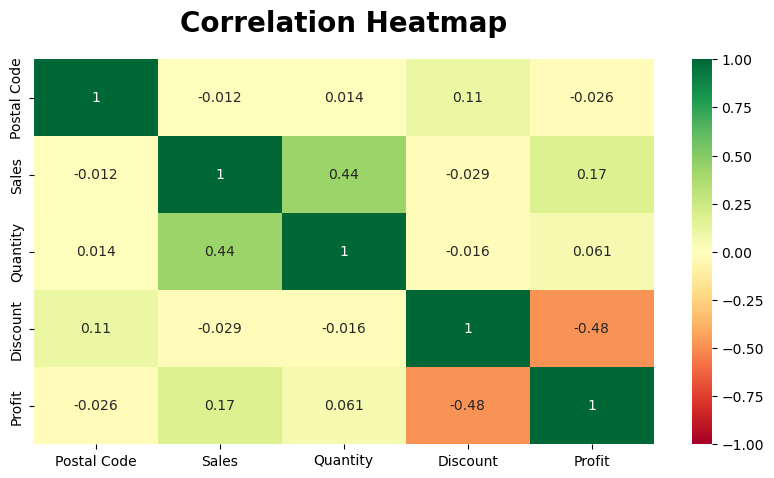

103305

In [25]:
plt.figure(figsize=(10,5))
fig = sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',vmin=-1.0,vmax=1.0)
plt.title('Correlation Heatmap',pad=20,fontsize=20,fontweight='bold')
plt.show()
plt.close('all')
del fig
gc.collect()

<Figure size 1000x500 with 0 Axes>

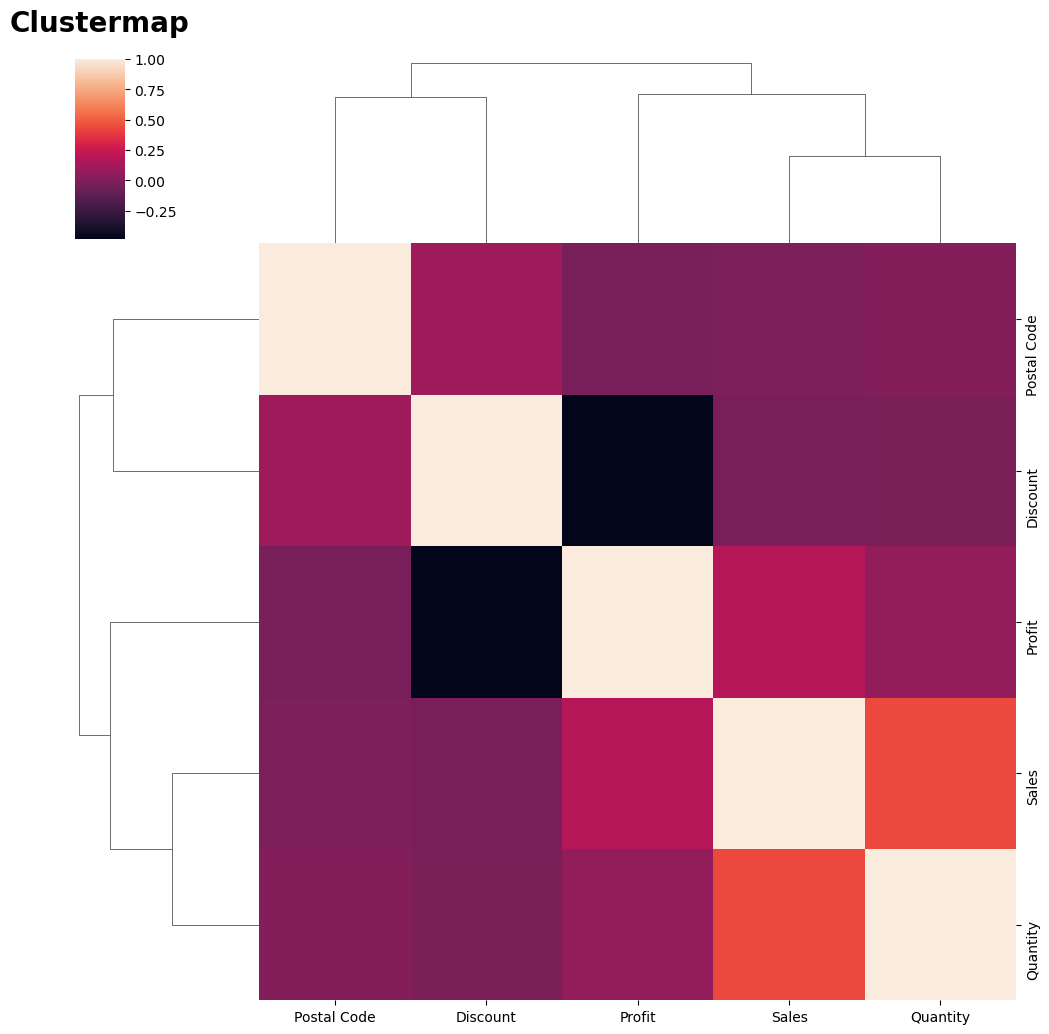

10027

In [26]:
plt.figure(figsize=(10,5))
fig = sns.clustermap(df.corr())
plt.title('Clustermap',pad=20,fontsize=20,fontweight='bold')
plt.show()
plt.close('all')
del fig
gc.collect()

In [27]:
import statsmodels.api as sm
df['Order Date'] = pd.to_datetime(df['Order Date'])
# Feature Engineering
def feature_engineering(df):
    # Time-related features
    df['year'] = df['Order Date'].dt.year
    df['month'] = df['Order Date'].dt.month
    df['day_of_week'] = df['Order Date'].dt.dayofweek
    df['day_of_month'] = df['Order Date'].dt.day
    df['week_of_year'] = df['Order Date'].dt.isocalendar().week
    df['quarter'] = df['Order Date'].dt.quarter
    df['is_weekend'] = (df['Order Date'].dt.dayofweek // 5).astype(int)  # 1 if weekend, 0 if weekday
    
    # Lag features (1 to 12 months)
    for lag in range(1, 13):
        df[f'sales_lag_{lag}'] = df['Sales'].shift(lag)
    
    # Rolling window statistics (mean, std, min, max over last 3 months)
    window_size = 3
    rolling_features = ['mean', 'std', 'min', 'max']
    for feature in rolling_features:
        df[f'sales_roll_{feature}_window{window_size}'] = df['Sales'].rolling(window=window_size).agg(feature)
    
    # Autocorrelation features (lags 1 to 12)
    for lag in range(1, 13):
        df[f'autocorr_lag_{lag}'] = df['Sales'].autocorr(lag)
    
    # Seasonal decomposition features (trend, seasonal, residual)
    decomposition = sm.tsa.seasonal_decompose(df['Sales'], model='additive', period=12)  # Assuming monthly data
    df['trend'] = decomposition.trend
    df['seasonal'] = decomposition.seasonal
    df['residual'] = decomposition.resid
    
    # Cyclical features (sine and cosine transformations of time indices)
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
    df.dropna(inplace=True)  
    return df

# Apply feature engineering to the DataFrame
df = feature_engineering(df)

# Split the data into training and testing sets
# (Assuming you have already split the data before feature engineering)
train_data = df[df['Order Date'] < '2023-01-01']
test_data = df[df['Order Date'] >= '2023-01-01']

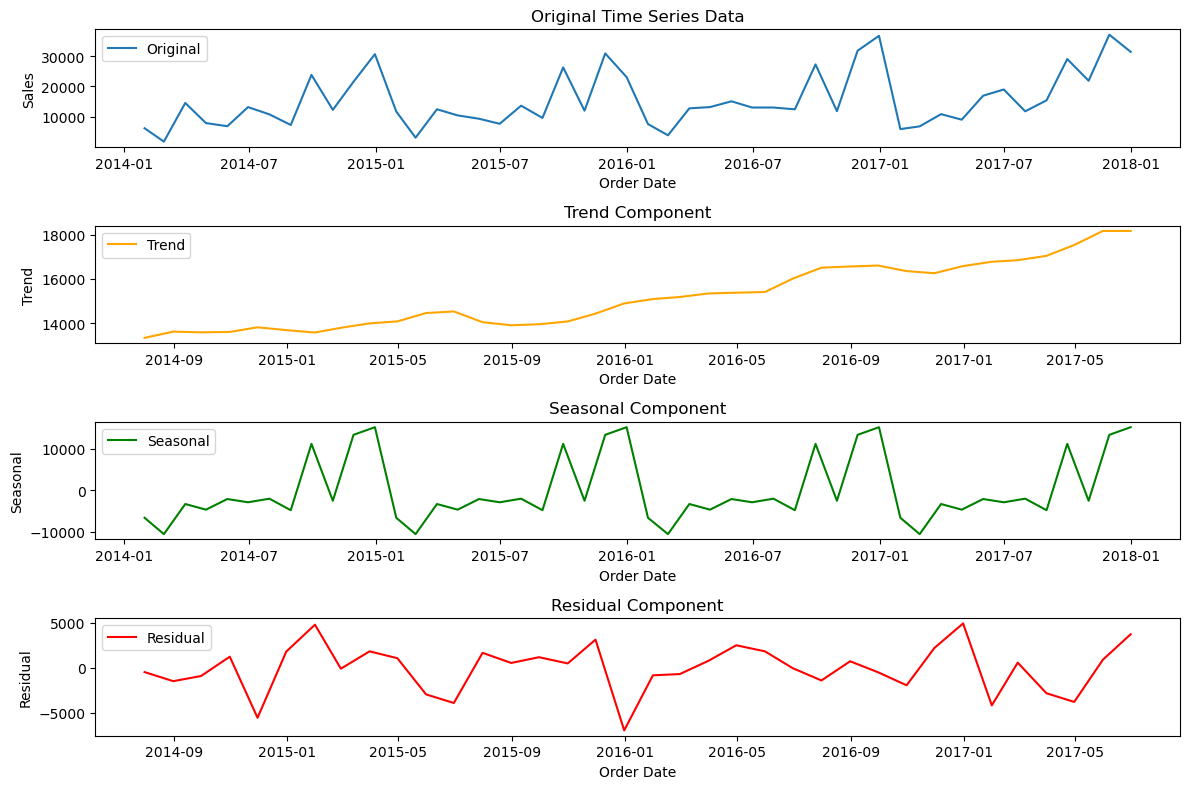

In [43]:
# Read the CSV file into a DataFrame
file_path = "C:/Users/Varsha/Downloads/Super_Store_data.csv"
df = pd.read_csv(file_path, encoding='latin1')

# Convert 'Order Date' column to datetime and set it as the index
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Resample daily sales data to monthly frequency
monthly_sales = df['Sales'].resample('M').sum()

# Decompose the time series data
decomposition = sm.tsa.seasonal_decompose(monthly_sales, model='additive', period=12)  # Assuming monthly data

# Plot the decomposed components
plt.figure(figsize=(12, 8))

# Original time series data
plt.subplot(4, 1, 1)
plt.plot(monthly_sales.index, monthly_sales, label='Original')
plt.title('Original Time Series Data')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()

# Trend component
plt.subplot(4, 1, 2)
plt.plot(monthly_sales.index, decomposition.trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.xlabel('Order Date')
plt.ylabel('Trend')
plt.legend()

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(monthly_sales.index, decomposition.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.xlabel('Order Date')
plt.ylabel('Seasonal')
plt.legend()

# Residual component
plt.subplot(4, 1, 4)
plt.plot(monthly_sales.index, decomposition.resid, label='Residual', color='red')
plt.title('Residual Component')
plt.xlabel('Order Date')
plt.ylabel('Residual')
plt.legend()

plt.tight_layout()
plt.show()


In [29]:
from sklearn.model_selection import train_test_split

# Define the percentage of data to use for training
train_size = 0.8  # 80% of the data will be used for training

# Calculate the index to split the data into training and testing sets
split_index = int(len(df) * train_size)

# Split the data into training and testing sets
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

# Display the number of observations in the training and testing sets
print("Training set size:", len(train_data))
print("Testing set size:", len(test_data))

Training set size: 1682
Testing set size: 421


In [ ]:
!pip install keras
!pip install tensorflow

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [36]:
# Scale the numerical features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['Sales', 'Quantity', 'Discount', 'Profit']])

# Create sequences of input features and target values
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])  # Input features (all columns except the last one)
        y.append(data[i+seq_length, -1])     # Target value (last column)
    return np.array(X), np.array(y)

# Define sequence length (number of time steps to look back)
seq_length = 12  # You can adjust this value as needed

# Create input sequences and target values for training and testing sets
X_train, y_train = create_sequences(scaled_features[:split_index], seq_length)
X_test, y_test = create_sequences(scaled_features[split_index:], seq_length)

# Display the shapes of the input sequences and target values
print("Training data:")
print("Input sequences shape:", X_train.shape)
print("Target") 

Training data:
Input sequences shape: (1670, 12, 3)
Target


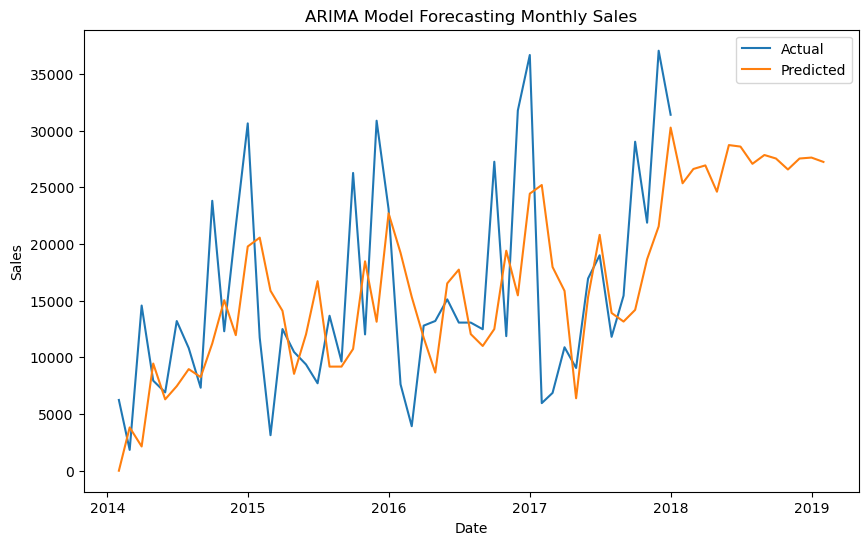

In [70]:
from statsmodels.tsa.arima.model import ARIMA

# Read the CSV file into a DataFrame
file_path = "C:/Users/Varsha/Downloads/Super_Store_data.csv"
df = pd.read_csv(file_path, encoding='latin1')

# Convert 'Order Date' column to datetime and set it as the index
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Resample daily sales data to monthly frequency
monthly_sales = df['Sales'].resample('M').sum()

# Fit ARIMA model
model = ARIMA(monthly_sales, order=(5,1,0)) # Example order, you can adjust parameters
result = model.fit()

# Generate predictions
predictions = result.predict(start=0, end=len(monthly_sales) + 12, typ='levels')

# Plot actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Actual')
plt.plot(predictions.index, predictions, label='Predicted')
plt.title('ARIMA Model Forecasting Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [75]:
# Scale the numerical features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['Sales', 'Quantity', 'Discount', 'Profit']])

# Define sequence length (number of time steps to look back)
seq_length = 12  # You can adjust this value as needed

# Create input sequences and target values for training and testing sets
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])  # Input features (all columns except the last one)
        y.append(data[i+seq_length, -1])     # Target value (last column)
    return np.array(X), np.array(y)

# Create input sequences and target values for training set
X_train, y_train = create_sequences(scaled_features[:split_index], seq_length)

# Create input sequences and target values for testing set
X_test, y_test = create_sequences(scaled_features[split_index:], seq_length)

# Display the shapes of the input sequences and target values
print("Training data:")
print("Input sequences shape:", X_train.shape)
print("Target values shape:", y_train.shape)
print("\nTesting data:")
print("Input sequences shape:", X_test.shape)
print("Target values shape:", y_test.shape)


Training data:
Input sequences shape: (1670, 12, 3)
Target values shape: (1670,)

Testing data:
Input sequences shape: (427, 12, 3)
Target values shape: (427,)


In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential([
    LSTM(units=64, input_shape=(seq_length, 3)),  # Change units according to your choice
    Dense(units=1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # You can choose other optimizers and loss functions

# Display model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.1, verbose=1)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                17408     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17473 (68.25 KB)
Trainable params: 17473 (68.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
24/24 [==============================] - 3s 29ms/step - loss: 0.1391 - val_loss: 0.0249
Epoch 2/50
24/24 [==============================] - 0s 8ms/step - loss: 0.0128 - val_loss: 0.0093
Epoch 3/50
24/24 [==============================] - 0s 9ms/step - loss: 0.0091 - val_loss: 0.0061
Epoch 4/50
24/24 [==============================] - 0s 8ms/step - loss: 0.0074 - val_loss: 0.0056
Epoch 5/50
24/24 [===

14/14 [==============================] - 0s 3ms/step - loss: 0.0030
Test Loss: 0.00295577896758914
14/14 [==============================] - 0s 2ms/step


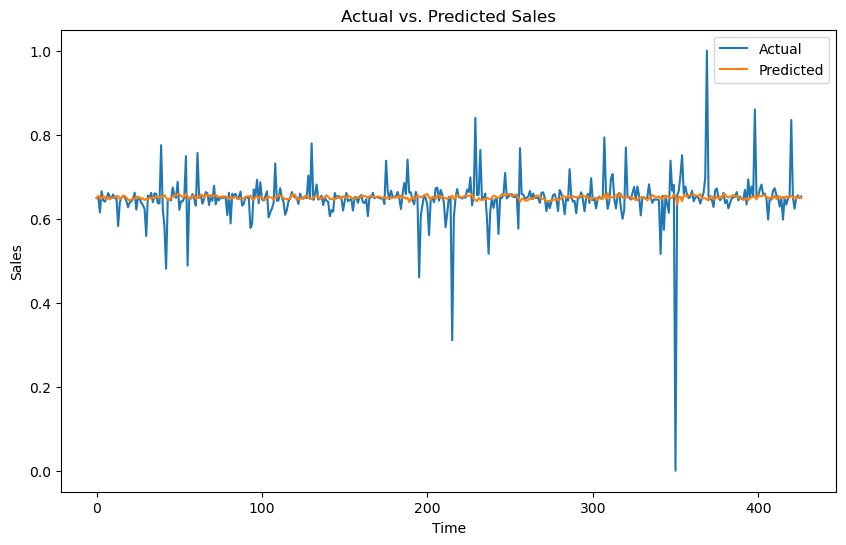

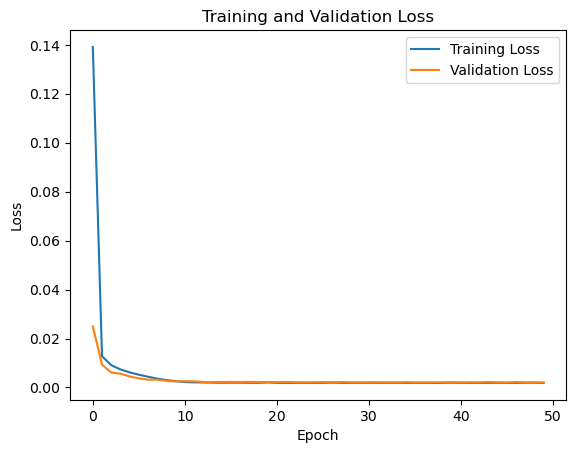

In [77]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Make predictions
predictions = model.predict(X_test)

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [79]:
print("Evaluation for LSTM")
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Evaluation for LSTM
Mean Squared Error: 0.002955779184964517
Mean Absolute Error: 0.02301809729703709
Root Mean Squared Error: 0.054367078135251275


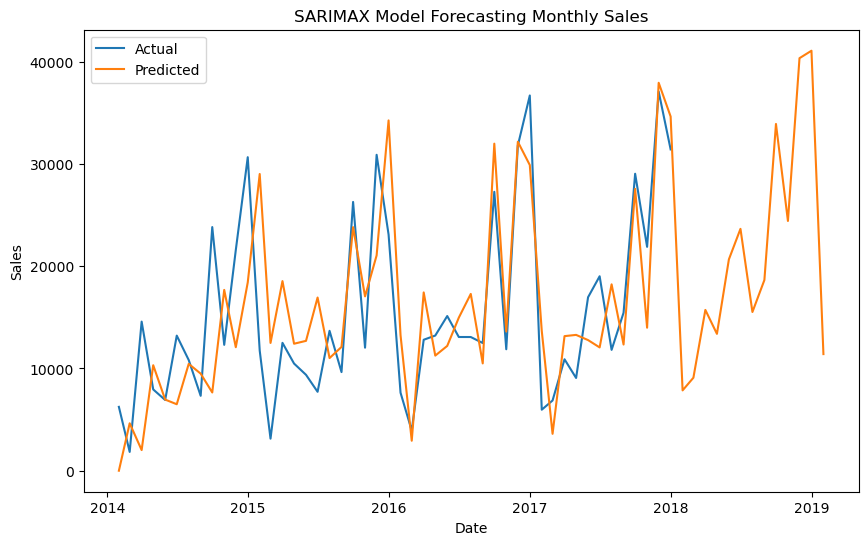

In [80]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Read the CSV file into a DataFrame
file_path = "C:/Users/Varsha/Downloads/Super_Store_data.csv"
df = pd.read_csv(file_path, encoding='latin1')

# Convert 'Order Date' column to datetime and set it as the index
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Resample daily sales data to monthly frequency
monthly_sales = df['Sales'].resample('M').sum()

# Define the SARIMAX model
model = SARIMAX(monthly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the model
result = model.fit()

# Generate predictions
predictions = result.predict(start=0, end=len(monthly_sales) + 12, typ='levels')

# Plot actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Actual')
plt.plot(predictions.index, predictions, label='Predicted')
plt.title('SARIMAX Model Forecasting Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [88]:
# Evaluate the model
print("AIC:", result.aic)
print("BIC:", result.bic)

AIC: 707.9043870058399
BIC: 715.681127313287
